# Import Libraries

In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

# Load Air DataFrame

In [167]:
df=pd.read_excel("AirQualityUCI.xlsx",na_values="-200")
df.head()


,Date,Time,CO(GT),PT08.S1(CO),NMHC(GT),C6H6(GT),PT08.S2(NMHC),NOx(GT),PT08.S3(NOx),NO2(GT),PT08.S4(NO2),PT08.S5(O3),T,RH,AH
0,2004-03-10,18:00:00,2.6,1360.00,150,11.881723,1045.50,166.0,1056.25,113.0,1692.00,1267.50,13.60,48.875001,0.757754
1,2004-03-10,19:00:00,2.0,1292.25,112,9.397165,954.75,103.0,1173.75,92.0,1558.75,972.25,13.30,47.700000,0.725487
2,2004-03-10,20:00:00,2.2,1402.00,88,8.997817,939.25,131.0,1140.00,114.0,1554.50,1074.00,11.90,53.975000,0.750239
3,2004-03-10,21:00:00,2.2,1375.50,80,9.228796,948.25,172.0,1092.00,122.0,1583.75,1203.25,11.00,60.000000,0.786713
4,2004-03-10,22:00:00,1.6,1272.25,51,6.518224,835.50,131.0,1205.00,116.0,1490.00,1110.00,11.15,59.575001,0.788794


# Data Cleaning(Handling Missing Values)

In [168]:
df.isnull().sum()

Date                0
Time                0
CO(GT)           1683
PT08.S1(CO)       366
NMHC(GT)            0
C6H6(GT)          366
PT08.S2(NMHC)     366
NOx(GT)          1639
PT08.S3(NOx)      366
NO2(GT)          1642
PT08.S4(NO2)      366
PT08.S5(O3)       366
T                 366
RH                366
AH                366
dtype: int64

In [169]:
for i in df.drop(["Date","Time"],axis=1).columns:
    df[i]=df[i].fillna(df[i].median())

In [170]:
feature_cols=["PT08.S1(CO)","PT08.S2(NMHC)","PT08.S3(NOx)","PT08.S4(NO2)","PT08.S5(O3)","T","RH","AH"]

In [171]:
df[feature_cols]

,PT08.S1(CO),PT08.S2(NMHC),PT08.S3(NOx),PT08.S4(NO2),PT08.S5(O3),T,RH,AH
0,1360.00,1045.50,1056.25,1692.00,1267.50,13.600,48.875001,0.757754
1,1292.25,954.75,1173.75,1558.75,972.25,13.300,47.700000,0.725487
2,1402.00,939.25,1140.00,1554.50,1074.00,11.900,53.975000,0.750239
3,1375.50,948.25,1092.00,1583.75,1203.25,11.000,60.000000,0.786713
4,1272.25,835.50,1205.00,1490.00,1110.00,11.150,59.575001,0.788794
...,...,...,...,...,...,...,...,...
9352,1314.25,1101.25,538.50,1374.25,1728.50,21.850,29.250000,0.756824
9353,1162.50,1027.00,603.75,1263.50,1269.00,24.325,23.725000,0.711864
9354,1142.00,1062.50,603.25,1240.75,1092.00,26.900,18.350000,0.640649
9355,1002.50,960.50,701.50,1041.00,769.75,28.325,13.550000,0.513866


In [172]:
df.describe()

,Date,CO(GT),PT08.S1(CO),NMHC(GT),C6H6(GT),PT08.S2(NMHC),NOx(GT),PT08.S3(NOx),NO2(GT),PT08.S4(NO2),PT08.S5(O3),T,RH,AH
count,9357,9357.000000,9357.000000,9357.000000,9357.000000,9357.000000,9357.000000,9357.000000,9357.000000,9357.000000,9357.000000,9357.000000,9357.000000,9357.000000
mean,2004-09-21 04:30:05.193972480,2.089302,1098.272025,-159.090093,10.010899,937.854610,235.131100,834.202567,112.360329,1456.401901,1020.452175,18.293913,49.244785,1.024351
min,2004-03-10 00:00:00,0.100000,647.250000,-200.000000,0.149048,383.250000,2.000000,322.000000,2.000000,551.000000,221.000000,-1.900000,9.175000,0.184679
25%,2004-06-16 00:00:00,1.200000,941.250000,-200.000000,4.591495,742.500000,112.000000,665.500000,85.900000,1241.500000,741.750000,12.025000,36.550000,0.746115
50%,2004-09-21 00:00:00,1.800000,1063.000000,-200.000000,8.239851,909.000000,179.800000,805.500000,109.000000,1462.750000,963.250000,17.750000,49.550000,0.995395
75%,2004-12-28 00:00:00,2.600000,1221.250000,-200.000000,13.636091,1104.750000,284.200000,960.250000,133.000000,1662.000000,1255.250000,24.075000,61.875000,1.296223
max,2005-04-04 00:00:00,11.900000,2039.750000,1189.000000,63.741476,2214.000000,1479.000000,2682.750000,339.700000,2775.000000,2522.750000,44.600000,88.725000,2.231036
std,NaN,1.323024,212.915093,139.789093,7.311212,261.622644,195.093027,251.808390,43.938455,339.367768,390.779481,8.659092,16.974420,0.395879


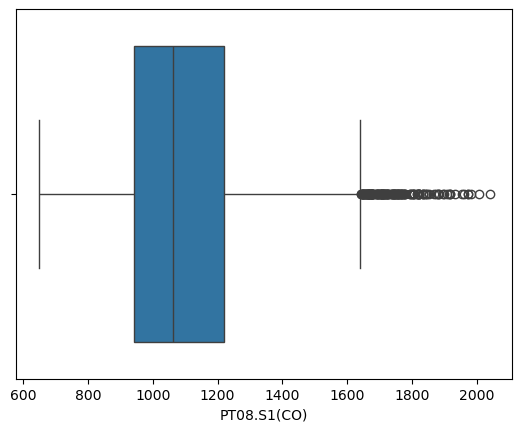

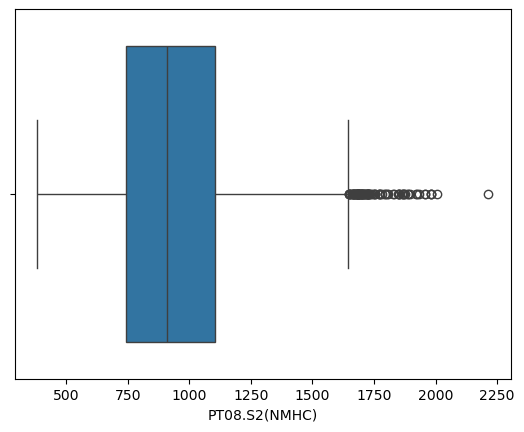

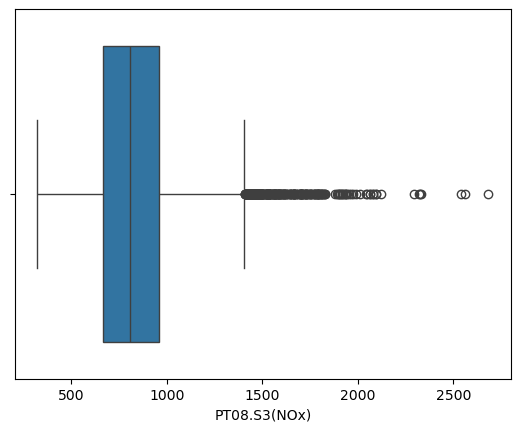

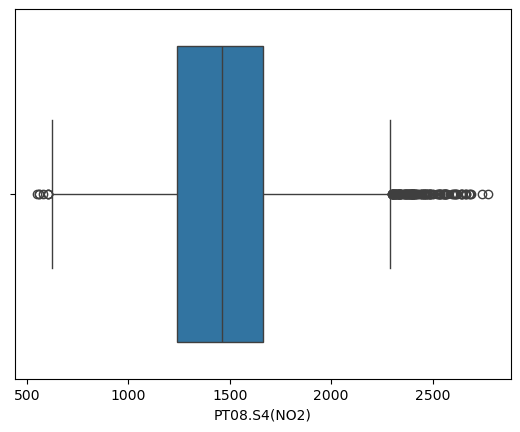

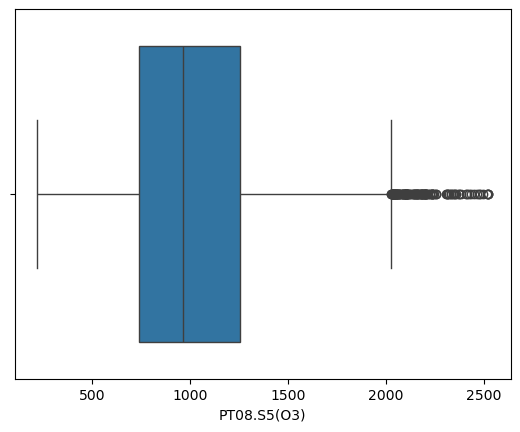

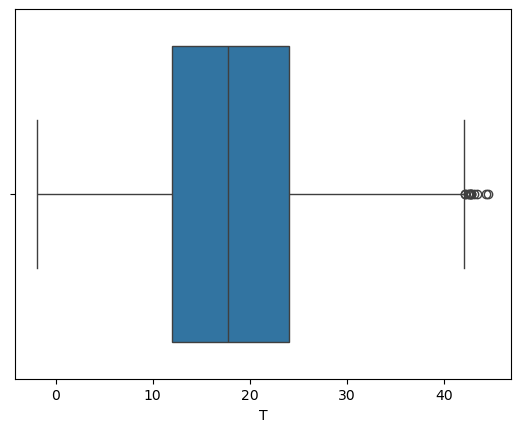

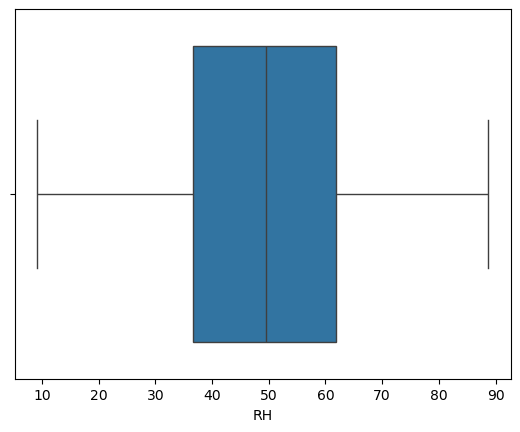

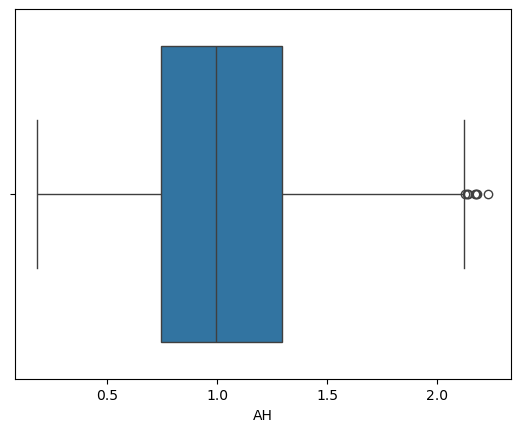

In [173]:
for i in df[feature_cols].columns:
    sns.boxplot(x=df[i])
    plt.show()

In [174]:
def upper_lower(df):
    Q1=df.quantile(0.25)
    Q3=df.quantile(0.75)
    IQR=Q3-Q1
    lower=Q1-(1.5*IQR)
    upper=Q3+(1.5*IQR)
    return lower,upper

In [175]:
lower=[]
upper=[]
outlier_df=pd.DataFrame(data={"min":[df[i].min() for i in feature_cols],"max":[df[i].max() for i in feature_cols]},index=feature_cols)
for i in feature_cols:
    lower.append(upper_lower(df[i])[0])
    upper.append(upper_lower(df[i])[1])
outlier_df["lower"] =lower
outlier_df["upper"] =upper

In [176]:
outlier_df

,min,max,lower,upper
PT08.S1(CO),647.250000,2039.750000,521.250000,1641.250000
PT08.S2(NMHC),383.250000,2214.000000,199.125000,1648.125000
PT08.S3(NOx),322.000000,2682.750000,223.375000,1402.375000
PT08.S4(NO2),551.000000,2775.000000,610.750000,2292.750000
PT08.S5(O3),221.000000,2522.750000,-28.500000,2025.500000
T,-1.900000,44.600000,-6.050000,42.150000
RH,9.175000,88.725000,-1.437500,99.862500
AH,0.184679,2.231036,-0.079046,2.121385


In [177]:
for column in feature_cols:
    df[column]=df[column].clip(lower=outlier_df.loc[column]["lower"],upper=outlier_df.loc[column]["upper"])

In [183]:
df2=df.copy()

In [184]:
df2["Time"] = pd.to_datetime(df2["Time"], format="%H:%M:%S")
df2["Hour"] = df2["Time"].dt.hour
df2["Minute"] = df2["Time"].dt.minute
df2["Second"] = df2["Time"].dt.second
df2.drop("Time",axis=1,inplace=True)
df2

,Date,CO(GT),PT08.S1(CO),NMHC(GT),C6H6(GT),PT08.S2(NMHC),NOx(GT),PT08.S3(NOx),NO2(GT),PT08.S4(NO2),PT08.S5(O3),T,RH,AH,Hour,Minute,Second
0,2004-03-10,2.6,1360.00,150,11.881723,1045.50,166.0,1056.25,113.0,1692.00,1267.50,13.600,48.875001,0.757754,18,0,0
1,2004-03-10,2.0,1292.25,112,9.397165,954.75,103.0,1173.75,92.0,1558.75,972.25,13.300,47.700000,0.725487,19,0,0
2,2004-03-10,2.2,1402.00,88,8.997817,939.25,131.0,1140.00,114.0,1554.50,1074.00,11.900,53.975000,0.750239,20,0,0
3,2004-03-10,2.2,1375.50,80,9.228796,948.25,172.0,1092.00,122.0,1583.75,1203.25,11.000,60.000000,0.786713,21,0,0
4,2004-03-10,1.6,1272.25,51,6.518224,835.50,131.0,1205.00,116.0,1490.00,1110.00,11.150,59.575001,0.788794,22,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
9352,2005-04-04,3.1,1314.25,-200,13.529605,1101.25,471.7,538.50,189.8,1374.25,1728.50,21.850,29.250000,0.756824,10,0,0
9353,2005-04-04,2.4,1162.50,-200,11.355157,1027.00,353.3,603.75,179.2,1263.50,1269.00,24.325,23.725000,0.711864,11,0,0
9354,2005-04-04,2.4,1142.00,-200,12.374538,1062.50,293.0,603.25,174.7,1240.75,1092.00,26.900,18.350000,0.640649,12,0,0
9355,2005-04-04,2.1,1002.50,-200,9.547187,960.50,234.5,701.50,155.7,1041.00,769.75,28.325,13.550000,0.513866,13,0,0


In [185]:
df2["Month"]=df2["Date"].dt.month
df2["Day"]=df2["Date"].dt.day
df2=df2.drop("Date",axis=1)
df2

,CO(GT),PT08.S1(CO),NMHC(GT),C6H6(GT),PT08.S2(NMHC),NOx(GT),PT08.S3(NOx),NO2(GT),PT08.S4(NO2),PT08.S5(O3),T,RH,AH,Hour,Minute,Second,Month,Day
0,2.6,1360.00,150,11.881723,1045.50,166.0,1056.25,113.0,1692.00,1267.50,13.600,48.875001,0.757754,18,0,0,3,10
1,2.0,1292.25,112,9.397165,954.75,103.0,1173.75,92.0,1558.75,972.25,13.300,47.700000,0.725487,19,0,0,3,10
2,2.2,1402.00,88,8.997817,939.25,131.0,1140.00,114.0,1554.50,1074.00,11.900,53.975000,0.750239,20,0,0,3,10
3,2.2,1375.50,80,9.228796,948.25,172.0,1092.00,122.0,1583.75,1203.25,11.000,60.000000,0.786713,21,0,0,3,10
4,1.6,1272.25,51,6.518224,835.50,131.0,1205.00,116.0,1490.00,1110.00,11.150,59.575001,0.788794,22,0,0,3,10
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
9352,3.1,1314.25,-200,13.529605,1101.25,471.7,538.50,189.8,1374.25,1728.50,21.850,29.250000,0.756824,10,0,0,4,4
9353,2.4,1162.50,-200,11.355157,1027.00,353.3,603.75,179.2,1263.50,1269.00,24.325,23.725000,0.711864,11,0,0,4,4
9354,2.4,1142.00,-200,12.374538,1062.50,293.0,603.25,174.7,1240.75,1092.00,26.900,18.350000,0.640649,12,0,0,4,4
9355,2.1,1002.50,-200,9.547187,960.50,234.5,701.50,155.7,1041.00,769.75,28.325,13.550000,0.513866,13,0,0,4,4


In [205]:
df2.corr()

,CO(GT),PT08.S1(CO),NMHC(GT),C6H6(GT),PT08.S2(NMHC),NOx(GT),PT08.S3(NOx),NO2(GT),PT08.S4(NO2),PT08.S5(O3),...,Hour,Minute,Second,Month,Day,CO(GT)_shifted1,NMHC(GT)_shifted1,C6H6(GT)_shifted1,NOx(GT)_shifted1,NO2(GT)_shifted1
CO(GT),1.000000,0.766459,0.174974,0.809010,0.791211,0.780505,-0.650682,0.656163,0.541152,0.757661,...,0.329461,NaN,NaN,0.087442,0.000360,0.822465,0.144752,0.713792,0.701012,0.575422
PT08.S1(CO),0.766459,1.000000,0.240307,0.876053,0.893057,0.617907,-0.809427,0.565127,0.675823,0.900722,...,0.322105,NaN,NaN,-0.040486,-0.019644,0.641298,0.214418,0.755836,0.542372,0.475157
NMHC(GT),0.174974,0.240307,1.000000,0.135401,0.134844,-0.091697,0.054532,-0.012326,0.209136,0.112116,...,0.049371,NaN,NaN,-0.230206,0.063571,0.143375,0.944545,0.114652,-0.101122,-0.029022
C6H6(GT),0.809010,0.876053,0.135401,1.000000,0.974523,0.616363,-0.769205,0.533687,0.754848,0.862005,...,0.335804,NaN,NaN,0.125958,-0.011110,0.649005,0.103977,0.836109,0.527006,0.435590
PT08.S2(NMHC),0.791211,0.893057,0.134844,0.974523,1.000000,0.601554,-0.829055,0.563631,0.773259,0.881739,...,0.382784,NaN,NaN,0.122639,-0.020002,0.652841,0.107502,0.835826,0.521579,0.465415
NOx(GT),0.780505,0.617907,-0.091697,0.616363,0.601554,1.000000,-0.605162,0.760738,0.196138,0.687337,...,0.213536,NaN,NaN,0.104709,-0.024542,0.666324,-0.102306,0.547554,0.889236,0.640648
PT08.S3(NOx),-0.650682,-0.809427,0.054532,-0.769205,-0.829055,-0.605162,1.000000,-0.592820,-0.551146,-0.831927,...,-0.324914,NaN,NaN,-0.075985,0.034150,-0.560980,0.072327,-0.683068,-0.552642,-0.519115
NO2(GT),0.656163,0.565127,-0.012326,0.533687,0.563631,0.760738,-0.592820,1.000000,0.138117,0.628539,...,0.331580,NaN,NaN,-0.167034,-0.016083,0.585184,-0.019283,0.500309,0.684826,0.851583
PT08.S4(NO2),0.541152,0.675823,0.209136,0.754848,0.773259,0.196138,-0.551146,0.138117,1.000000,0.588596,...,0.219213,NaN,NaN,0.172462,-0.039918,0.427968,0.185721,0.642410,0.131005,0.064741
PT08.S5(O3),0.757661,0.900722,0.112116,0.862005,0.881739,0.687337,-0.831927,0.628539,0.588596,1.000000,...,0.239432,NaN,NaN,0.047010,-0.032484,0.673116,0.097018,0.783437,0.635562,0.554280


In [188]:
targets=["CO(GT)","NMHC(GT)","C6H6(GT)","NOx(GT)","NO2(GT)"]
for target in targets:
    df2[target+"_shifted1"]=df2[target].shift(1).fillna(0)

In [189]:
df2

,CO(GT),PT08.S1(CO),NMHC(GT),C6H6(GT),PT08.S2(NMHC),NOx(GT),PT08.S3(NOx),NO2(GT),PT08.S4(NO2),PT08.S5(O3),...,Hour,Minute,Second,Month,Day,CO(GT)_shifted1,NMHC(GT)_shifted1,C6H6(GT)_shifted1,NOx(GT)_shifted1,NO2(GT)_shifted1
0,2.6,1360.00,150,11.881723,1045.50,166.0,1056.25,113.0,1692.00,1267.50,...,18,0,0,3,10,0.0,0.0,0.000000,0.0,0.0
1,2.0,1292.25,112,9.397165,954.75,103.0,1173.75,92.0,1558.75,972.25,...,19,0,0,3,10,2.6,150.0,11.881723,166.0,113.0
2,2.2,1402.00,88,8.997817,939.25,131.0,1140.00,114.0,1554.50,1074.00,...,20,0,0,3,10,2.0,112.0,9.397165,103.0,92.0
3,2.2,1375.50,80,9.228796,948.25,172.0,1092.00,122.0,1583.75,1203.25,...,21,0,0,3,10,2.2,88.0,8.997817,131.0,114.0
4,1.6,1272.25,51,6.518224,835.50,131.0,1205.00,116.0,1490.00,1110.00,...,22,0,0,3,10,2.2,80.0,9.228796,172.0,122.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
9352,3.1,1314.25,-200,13.529605,1101.25,471.7,538.50,189.8,1374.25,1728.50,...,10,0,0,4,4,3.9,-200.0,13.552393,522.7,186.5
9353,2.4,1162.50,-200,11.355157,1027.00,353.3,603.75,179.2,1263.50,1269.00,...,11,0,0,4,4,3.1,-200.0,13.529605,471.7,189.8
9354,2.4,1142.00,-200,12.374538,1062.50,293.0,603.25,174.7,1240.75,1092.00,...,12,0,0,4,4,2.4,-200.0,11.355157,353.3,179.2
9355,2.1,1002.50,-200,9.547187,960.50,234.5,701.50,155.7,1041.00,769.75,...,13,0,0,4,4,2.4,-200.0,12.374538,293.0,174.7


In [210]:
df_CO=df2[['Month', 'Day',"Hour", 'PT08.S1(CO)',
       'PT08.S2(NMHC)',  'PT08.S3(NOx)',  'PT08.S4(NO2)',
       'PT08.S5(O3)', 'T', 'RH', 'AH',"CO(GT)_shifted1","CO(GT)"]].copy()

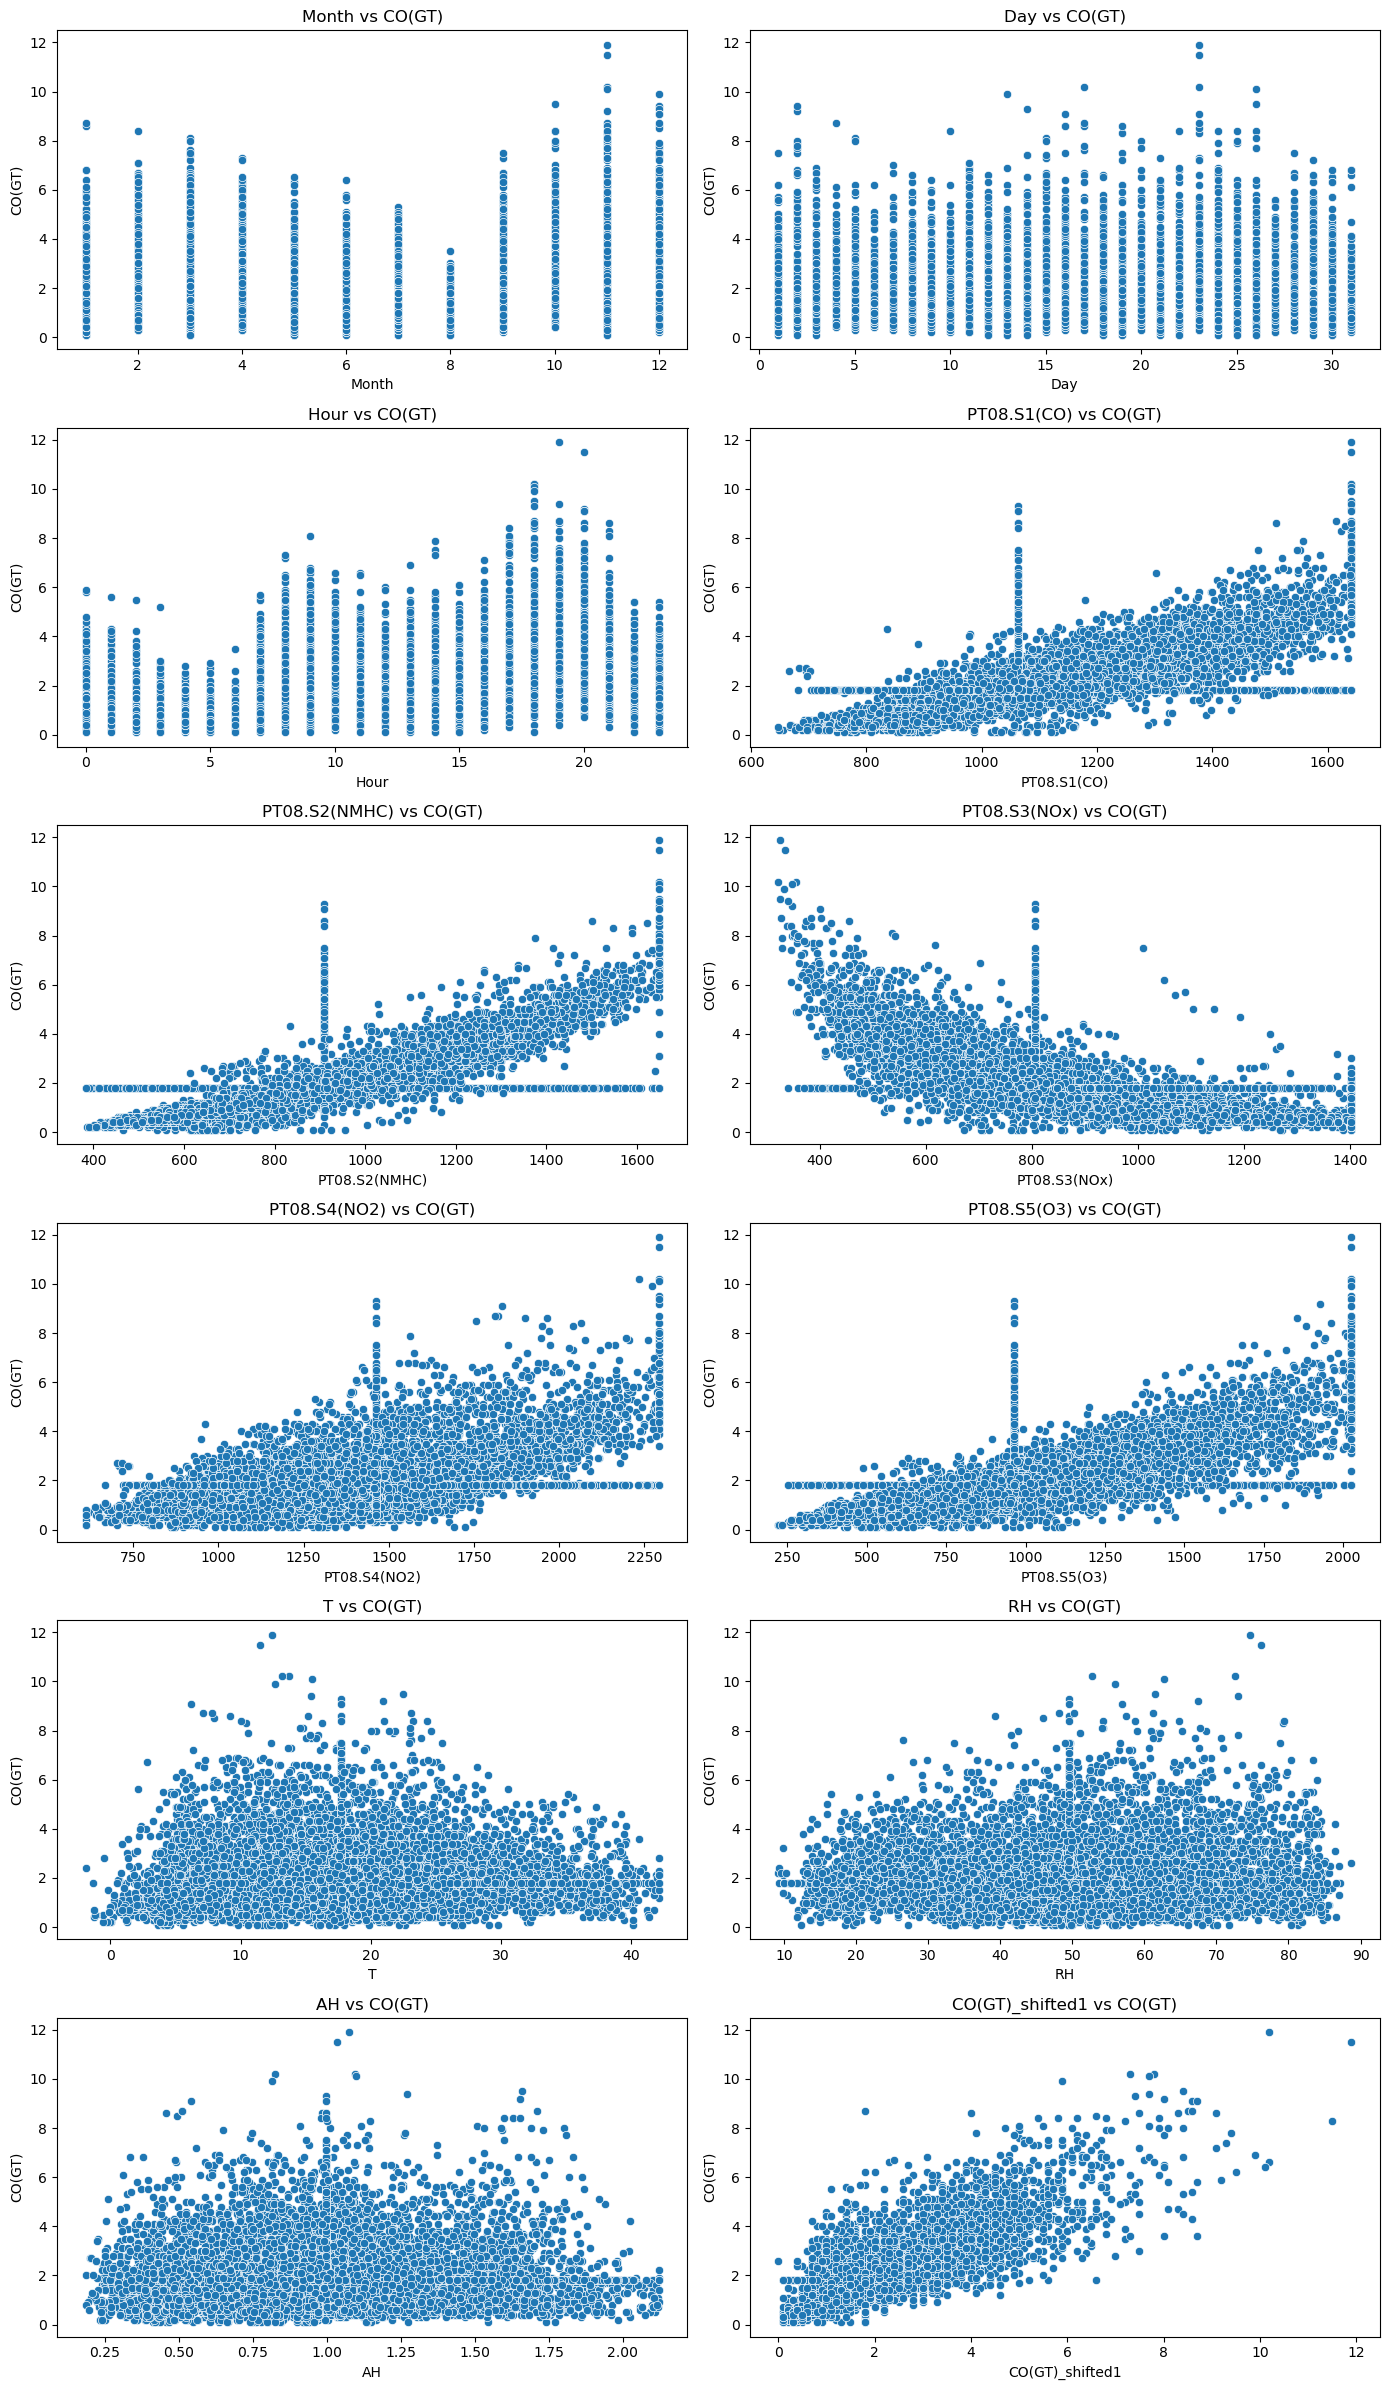

In [213]:


# Get independent feature names
independent_features = df_CO.drop("CO(GT)", axis=1).columns
num_features = len(independent_features)

# Set up subplot grid (2 columns per row)
rows = (num_features // 2) + (num_features % 2)  # Ensure enough rows
fig, axes = plt.subplots(nrows=rows, ncols=2, figsize=(14, rows * 4))  # Adjust figure size

# Flatten axes array for easy iteration
axes = np.array(axes).flatten()

# Plot scatter plots
for i, col in enumerate(independent_features):
    sns.scatterplot(x=df_CO[col], y=df_CO["CO(GT)"], ax=axes[i])
    axes[i].set_title(f'{col} vs CO(GT)')

# Hide unused subplots if columns are odd
for j in range(i + 1, len(axes)):
    fig.delaxes(axes[j])

plt.tight_layout()
plt.show()


In [214]:
X=df_CO[['Month', 'Day',"Hour", 'PT08.S1(CO)',
       'PT08.S2(NMHC)',  'PT08.S3(NOx)',  'PT08.S4(NO2)',
       'PT08.S5(O3)', 'T', 'RH', 'AH',"CO(GT)_shifted1"]].copy()
y=df_CO["CO(GT)"].copy()

In [217]:
X

,Month,Day,Hour,PT08.S1(CO),PT08.S2(NMHC),PT08.S3(NOx),PT08.S4(NO2),PT08.S5(O3),T,RH,AH,CO(GT)_shifted1
0,3,10,18,1360.00,1045.50,1056.25,1692.00,1267.50,13.600,48.875001,0.757754,0.0
1,3,10,19,1292.25,954.75,1173.75,1558.75,972.25,13.300,47.700000,0.725487,2.6
2,3,10,20,1402.00,939.25,1140.00,1554.50,1074.00,11.900,53.975000,0.750239,2.0
3,3,10,21,1375.50,948.25,1092.00,1583.75,1203.25,11.000,60.000000,0.786713,2.2
4,3,10,22,1272.25,835.50,1205.00,1490.00,1110.00,11.150,59.575001,0.788794,2.2
...,...,...,...,...,...,...,...,...,...,...,...,...
9352,4,4,10,1314.25,1101.25,538.50,1374.25,1728.50,21.850,29.250000,0.756824,3.9
9353,4,4,11,1162.50,1027.00,603.75,1263.50,1269.00,24.325,23.725000,0.711864,3.1
9354,4,4,12,1142.00,1062.50,603.25,1240.75,1092.00,26.900,18.350000,0.640649,2.4
9355,4,4,13,1002.50,960.50,701.50,1041.00,769.75,28.325,13.550000,0.513866,2.4


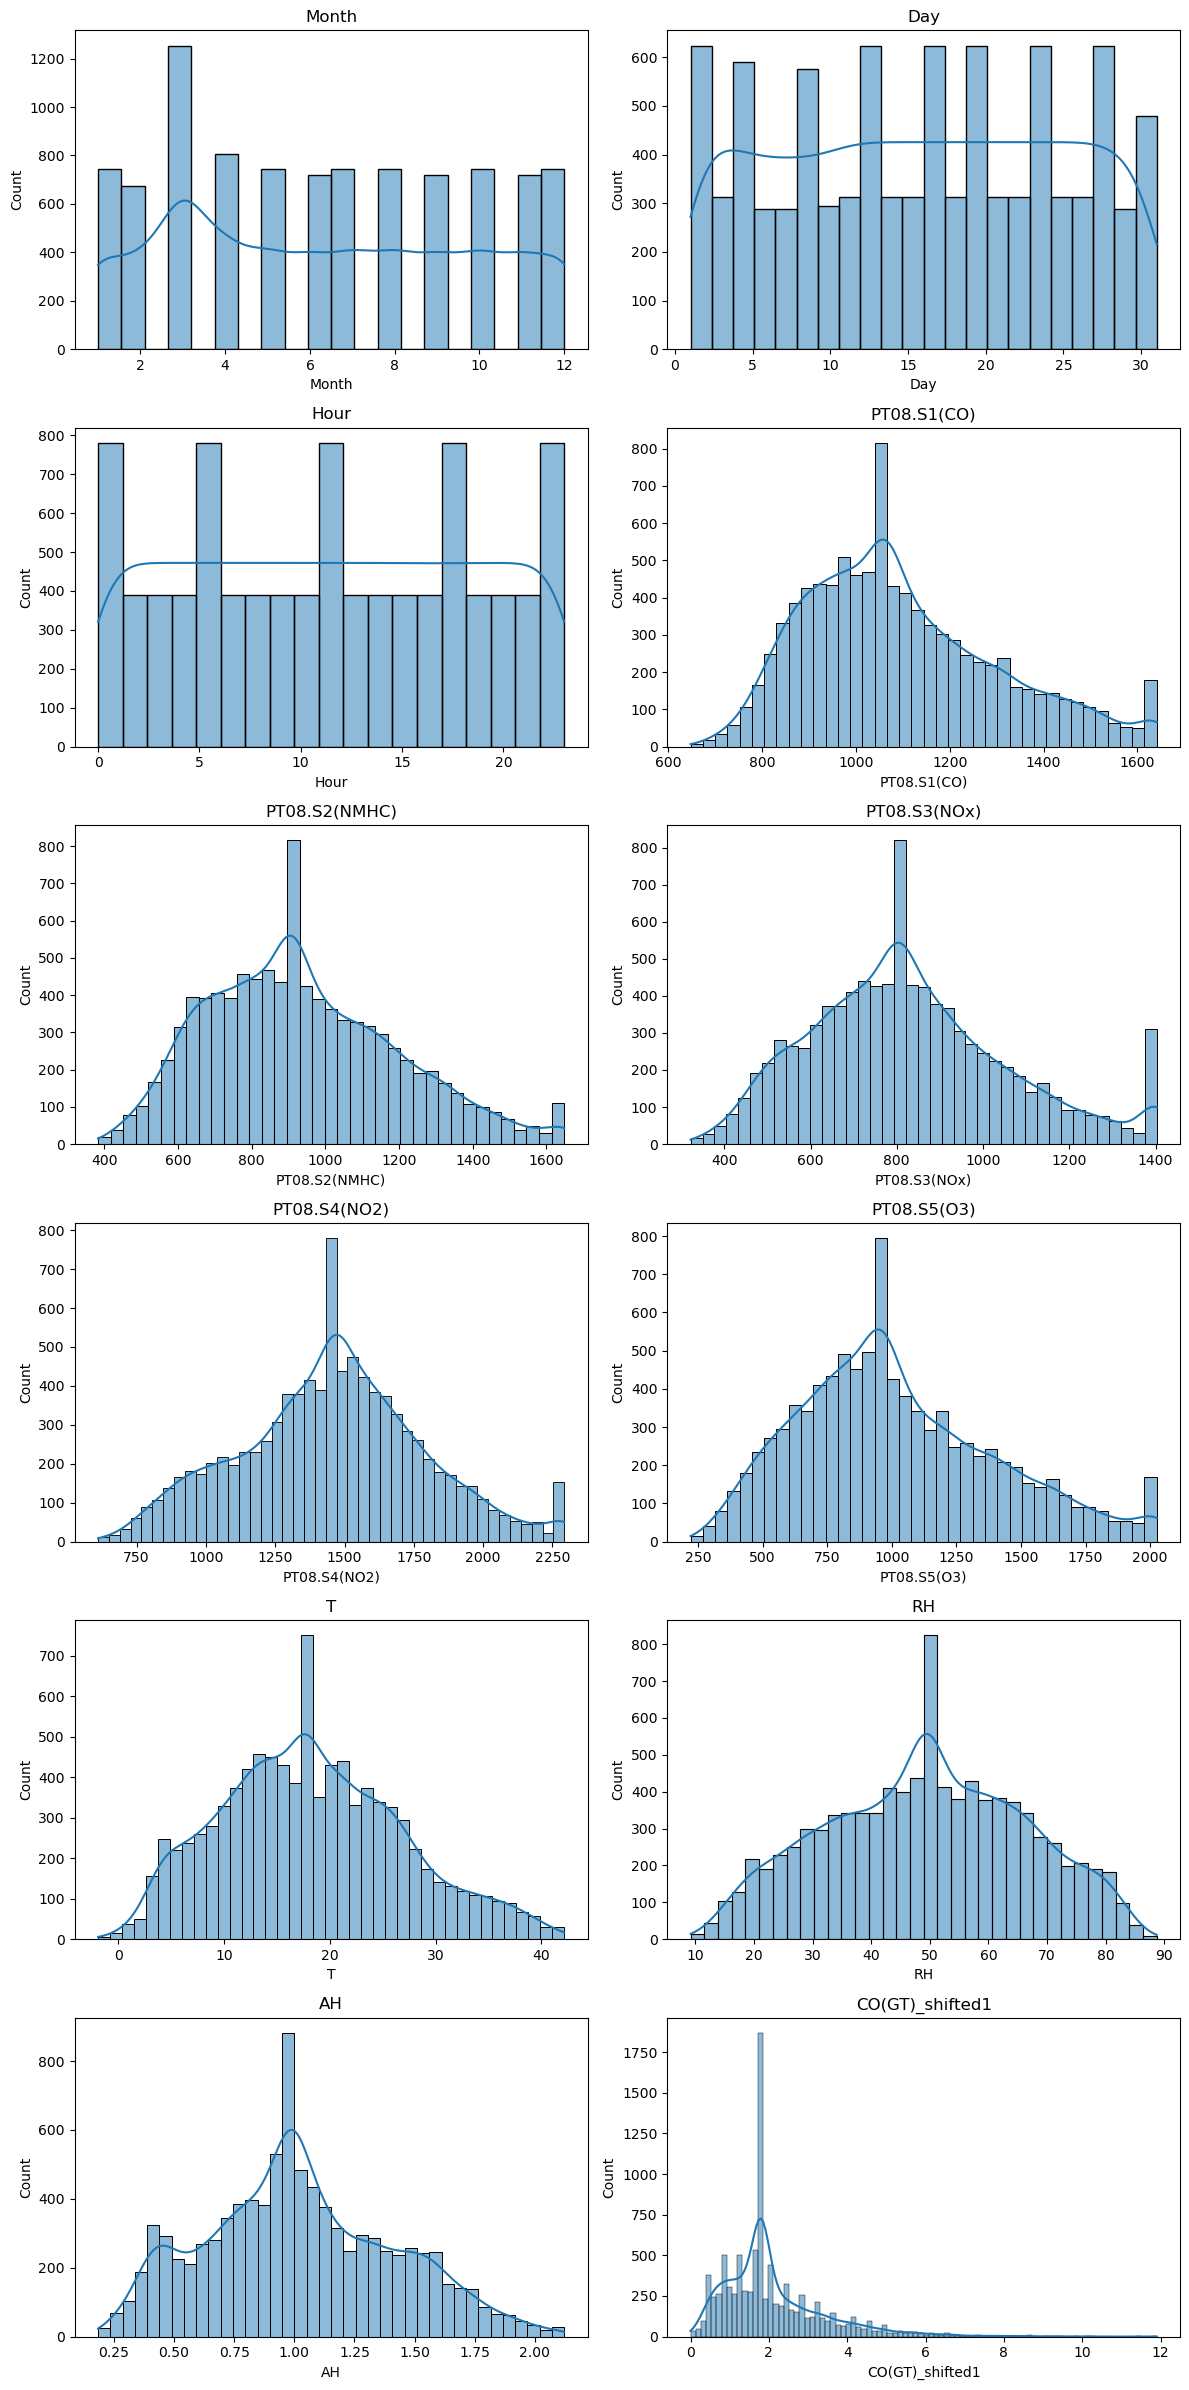

In [218]:


# Number of columns
num_cols = len(X.columns)

# Set up subplot grid (2 columns per row)
fig, axes = plt.subplots(nrows=(num_cols // 2) + (num_cols % 2), ncols=2, figsize=(12, num_cols * 2))

# Flatten axes array for easy iteration
axes = axes.flatten()

# Plot each column
for i, col in enumerate(X.columns):
    sns.histplot(X[col], ax=axes[i],kde=True)
    axes[i].set_title(col)

# Hide unused subplots (if columns are odd)
for j in range(i + 1, len(axes)):
    fig.delaxes(axes[j])

plt.tight_layout()
plt.show()


In [241]:
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import MinMaxScaler
scale=MinMaxScaler()
X[X.columns]=scale.fit_transform(X[X.columns])
X_train,X_test,y_train,y_test=train_test_split(X,y,random_state=42,test_size=0.3)
X_train.shape[0],X_test.shape[0]

(6549, 2808)

In [242]:
from sklearn.linear_model import LinearRegression
from sklearn.linear_model import Ridge
from sklearn.tree import DecisionTreeRegressor
from sklearn.ensemble import RandomForestRegressor
from xgboost import XGBRegressor
from sklearn.metrics import r2_score

## Training With LinearRegression

In [243]:
model=LinearRegression()
model.fit(X_train,y_train)
y_pred=model.predict(X_test)
train_pred=model.predict(X_train)
test_score=r2_score(y_test,y_pred)
train_score=r2_score(y_train,train_pred)
print(f"Test_Score: {test_score}, Train_Score: {train_score}")

Test_Score: 0.8126942928532812, Train_Score: 0.8089842942473593


# Training With Ridge

In [244]:
model=Ridge()
model.fit(X_train,y_train)
y_pred=model.predict(X_test)
train_pred=model.predict(X_train)
test_score=r2_score(y_test,y_pred)
train_score=r2_score(y_train,train_pred)
print(f"Test_Score: {test_score}, Train_Score: {train_score}")

Test_Score: 0.8124381532580477, Train_Score: 0.8088576493205712


# Training With RandomForest

In [245]:
model=RandomForestRegressor(n_estimators=100, max_depth=5, min_samples_split=5, min_samples_leaf=2, random_state=42)
model.fit(X_train,y_train)
y_pred=model.predict(X_test)
train_pred=model.predict(X_train)
test_score=r2_score(y_test,y_pred)
train_score=r2_score(y_train,train_pred)
print(f"Test_Score: {test_score}, Train_Score: {train_score}")

Test_Score: 0.8575995533229653, Train_Score: 0.8766941587912667


## Training WIth XGBOOST

In [246]:
model=XGBRegressor()
model.fit(X_train,y_train)
y_pred=model.predict(X_test)
train_pred=model.predict(X_train)
test_score=r2_score(y_test,y_pred)
train_score=r2_score(y_train,train_pred)
print(f"Test_Score: {test_score}, Train_Score: {train_score}")

Test_Score: 0.9002757257629139, Train_Score: 0.9847143052437848
